In [ ]:
# We arrange the images into train, test ,valid resp with some random sampling 
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(0,10):
        shutil.move(f'{i}','train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples=random.sample(os.listdir(f'train/{i}'),30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}',f'valid/{i}')
            
        
        test_samples=random.sample(os.listdir(f'train/{i}'),5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}',f'test/{i}')
            
            
os.chdir('../..')
        

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [38]:
train_path='/content/gdrive/MyDrive/Sign langauage classification CNN/train'
test_path='/content/gdrive/MyDrive/Sign langauage classification CNN/test'
valid_path='/content/gdrive/MyDrive/Sign langauage classification CNN/valid'

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size=(224,224),batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path,target_size=(224,224),batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(224,224),batch_size=10,shuffle=False)
##we keep shuffle=False in test_batches

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [42]:
# Model Creation

In [43]:
mobile=tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [44]:
x=mobile.layers[-6].output
output=tf.keras.layers.Dense(units=10,activation='softmax')(x)  ##we pass here the (x) as this is a functional API 

In [50]:
model1=tf.keras.Model(inputs=mobile.input,outputs=output)  ##Model is how we pass the functional model 

In [51]:
for layer in model1.layers[:-23]:
    layer.trainable=False

In [52]:
model1.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [53]:
# Compiling the model 
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
# Fitting the model 
model_history1=model1.fit(x=train_batches,steps_per_epoch=len(train_batches),validation_data=valid_batches,validation_steps=len(valid_batches),epochs=30,verbose=2)

Epoch 1/30
172/172 - 12s - loss: 0.3982 - accuracy: 0.9001 - val_loss: 0.1606 - val_accuracy: 0.9667
Epoch 2/30
172/172 - 10s - loss: 0.0962 - accuracy: 0.9866 - val_loss: 0.1484 - val_accuracy: 0.9600
Epoch 3/30
172/172 - 10s - loss: 0.0510 - accuracy: 0.9936 - val_loss: 0.0802 - val_accuracy: 0.9700
Epoch 4/30
172/172 - 10s - loss: 0.0284 - accuracy: 0.9965 - val_loss: 0.0550 - val_accuracy: 0.9900
Epoch 5/30
172/172 - 10s - loss: 0.0228 - accuracy: 0.9977 - val_loss: 0.0437 - val_accuracy: 0.9867
Epoch 6/30
172/172 - 10s - loss: 0.0207 - accuracy: 0.9971 - val_loss: 0.0548 - val_accuracy: 0.9933
Epoch 7/30
172/172 - 10s - loss: 0.0140 - accuracy: 0.9988 - val_loss: 0.0452 - val_accuracy: 0.9833
Epoch 8/30
172/172 - 10s - loss: 0.0103 - accuracy: 0.9994 - val_loss: 0.0357 - val_accuracy: 0.9900
Epoch 9/30
172/172 - 10s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9900
Epoch 10/30
172/172 - 10s - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.0222 - val_accura

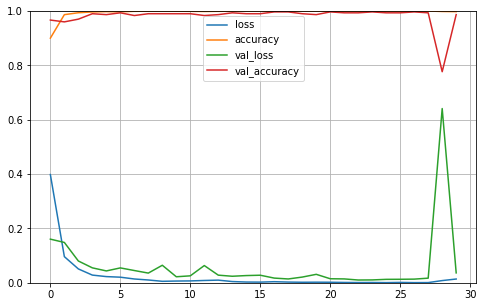

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(model_history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [57]:
test_labels = test_batches.classes

In [59]:
predictions = model1.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [63]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [64]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 1 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


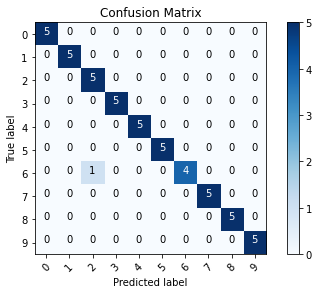

In [67]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')